# Modulation-Based Ridge Detection and Mode Reconstruction

In [4]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from benchmark_demo.utilstf import get_spectrogram
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.Benchmark import Benchmark
from methods.method_MB_RD import NewMethod

In [5]:
np.random.seed(0) 
# signal parameters
SNRin = 20
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_damped_cos()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture_5()

noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)


In [6]:
Nfft = 2*N
S, F= get_spectrogram(signal,)
F = F[0:N+1]

methodml = NewMethod()
funa = methodml.method
signal_output = funa(signal)#, nc=10)
qrf = Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax)
qrf

5.676395389779573

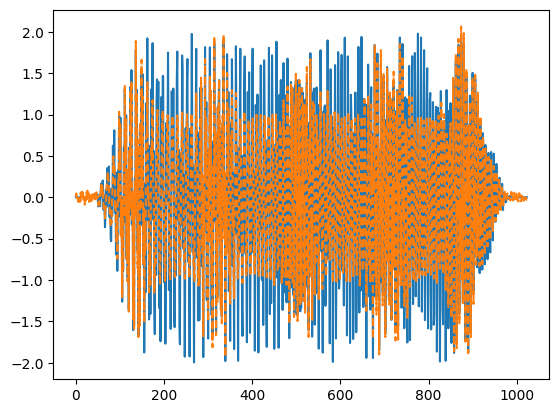

In [7]:
S_output, F_output = get_spectrogram(signal_output,)
F_output = F_output[0:N+1]

plt.figure()
plt.plot(s)
plt.plot(signal_output,'--')

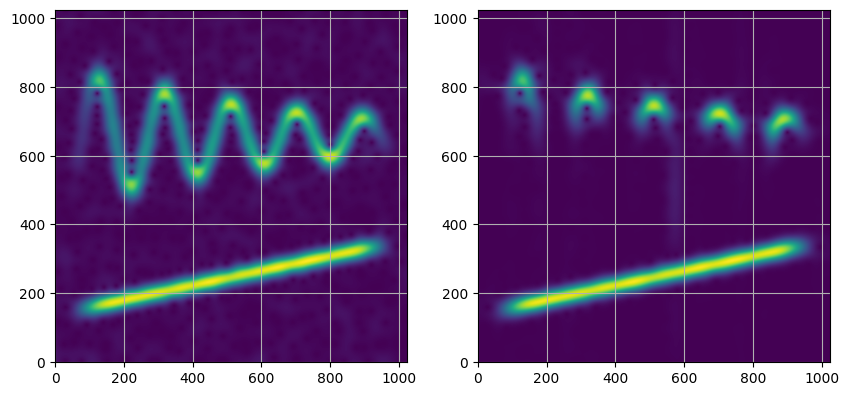

In [8]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[0].grid(True)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].grid(True)
plt.show()


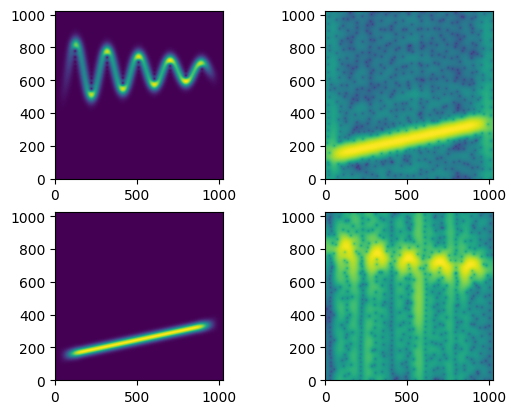

In [9]:
# xr = nils_method(x,Ncomp,M,approach,sigma_s,clwin,return_comps,return_freq)
signal_output = funa(signal,[], [], [], [], [], True)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    S, F = get_spectrogram(signal.comps[i],)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[i],)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(np.log(abs(F_output)), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()

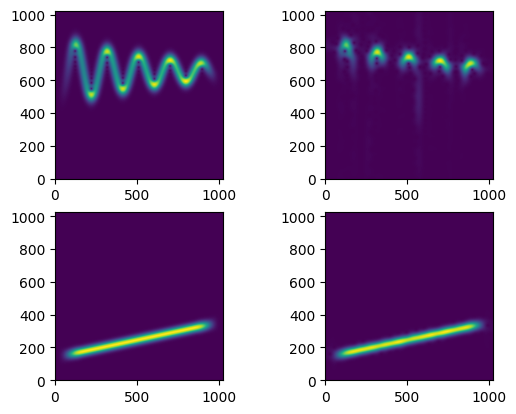

In [10]:
from benchmark_demo.perf_metrics import order_components, mse

order = order_components(signal_output,signal.comps)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i],)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[order[i]],)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower',)#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

2


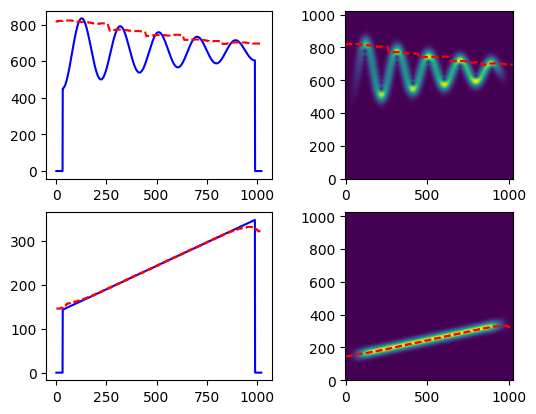

In [11]:
signal_output = funa(signal,[], [], [], [], [], [], True)
order = order_components(signal_output,signal.instf, minormax = 'min', metric = mse)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i],)
    F = F[0:N+1]
    # S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    # F_output = F_output[0:N+1]

    axs[i,0].plot(signal.instf[i]*Nfft,'b')
    axs[i,0].plot(signal_output[order[i]]*Nfft,'r--')
    axs[i,1].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].plot(signal_output[order[i]]*Nfft,'r--')

print(len(signal.instf))